<a href="https://colab.research.google.com/github/IEXE-Tec/aprendizaje-maquina-2/blob/master/02_reduccion_de_dimensionalidad.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [8]:
import pandas as pd
import numpy as np

# ML
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Graphics
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_style('darkgrid')
sns.set(rc={'figure.figsize':(14,8)})

## Metodo PCA de sklearn:

Antes de continuar lee a detalle la documentacion del metodo de PCA de sklearn que utilizaremos por los siguientes 1000 annos:
https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html 

# PCA para Reduccion de Dimensionalidad

## Visualizacion I: Que es PCA?
Observemos como se comporta el PCA cuando hay una relacion lineal entre 2 variables explicada por un proceso compartido por ambas.

### Preguntas importantes:
1. Como se relaciona c1 con pc1?
2. Como se relaciona pc1 con x1 y x2? (Nota el signo "+ ,-" de los coeficientes que relacionan a (x1 , x2) con c1)
3. Porque es tan grande la varianza explicada del primer componente?




Explained Variance:  [0.97779157]
Sum of Explained Variance:  0.9777915714597009
Principal Components [[ 0.32379223 -0.94612821]]


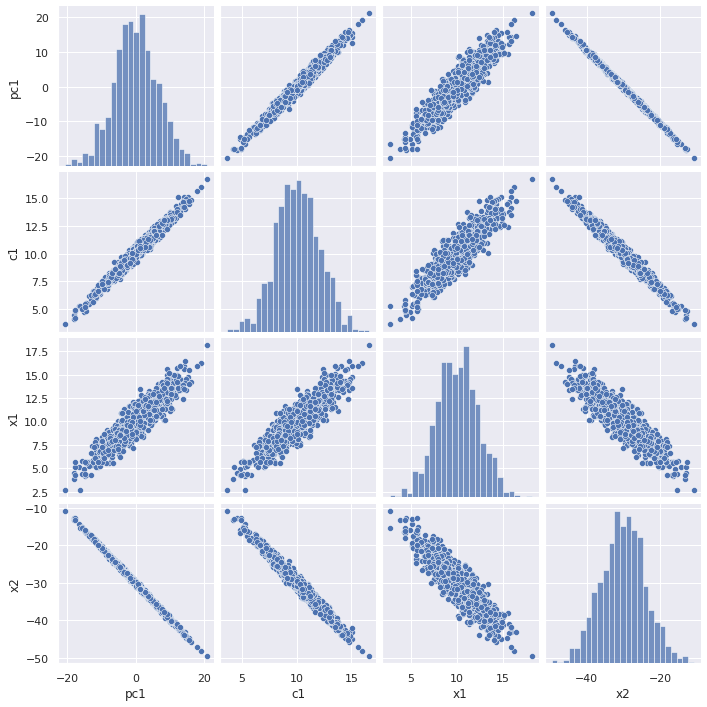

In [9]:
# Set parameters & seed
np.random.seed(7463)
n = 1000

# Create components
c1 = np.random.normal(10,2,n)

# Create Variables
x1 = c1 + np.random.normal(0,1,n)
x2 = -3*c1 + np.random.normal(0,1,n)

# Create Pandas
x = pd.DataFrame.from_dict({'x1':x1,'x2':x2})
components = pd.DataFrame.from_dict({'c1':c1})

# PCA decomposition
pca = PCA(n_components=1)
principalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['pc1'])

finalDf = pd.concat([principalDf, components, x], axis = 1)
print('Explained Variance: ', pca.explained_variance_ratio_)
print('Sum of Explained Variance: ', np.sum(pca.explained_variance_ratio_))
print('Principal Components',  pca.components_)
sns.pairplot(finalDf)

### Respuesta a Preguntas importantes:
1. Como se relaciona c1 con pc1?

2. Como se relaciona pc1 con x1 y x2? (Nota el signo "+ ,-" de los coeficientes que relacionan a (x1 , x2) con c1)

3. Porque es tan grande la varianza explicada del primer componente?




## Visualizacion II: Un extranno llega!
Ahora observemos que pasa si agregamos una tercera varible que no esta relacionada, es decir que no comparte un proceso con las otras variables.  
x1 y x2 comparten un proceso lineal, pero la nueva varaible x3 no!

### Preguntas importantes:
1. Como se relaciona c1 con pc1?
2. Como se relaciona pc1 con x3?
3. Que paso con la varianza explicada por pc1 respecto a la visualizacion anterior?
4. La relacion entre pc1, c1, x1 & x2 se vio afectada drasticamente por x3?




Explained Variance:  [0.9555074]
Sum of Explained Variance:  0.9555074011749376
Principal Components [[ 0.32378742 -0.94610869  0.00632876]]


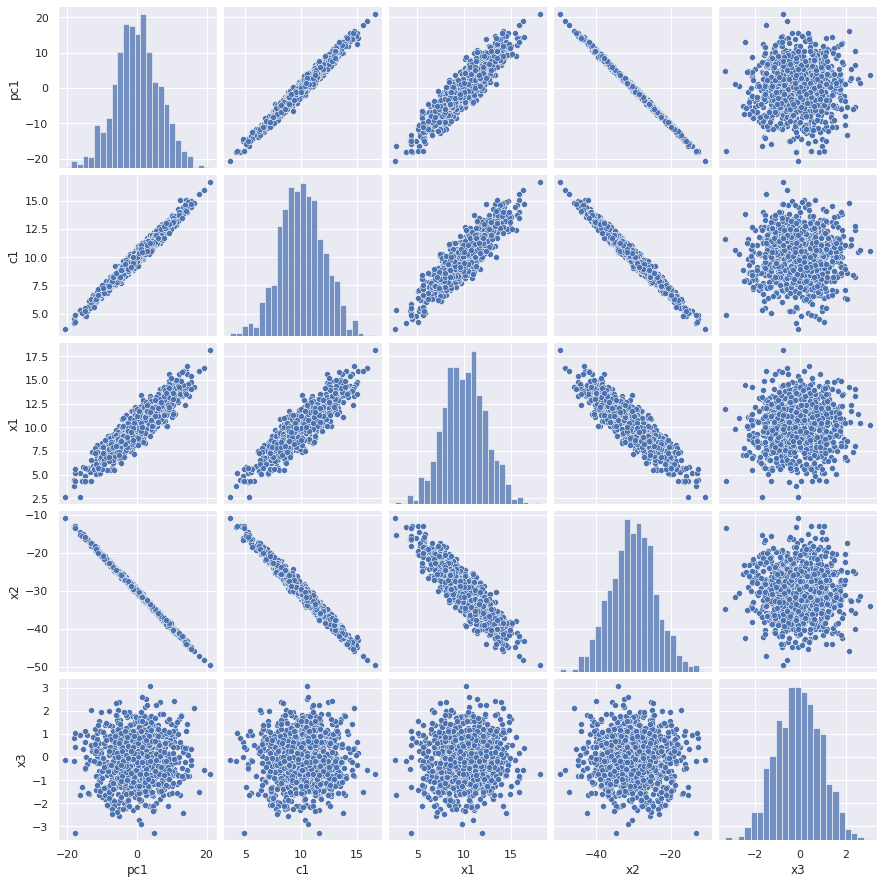

In [10]:
# Set parameters & seed
np.random.seed(7463)
n = 1000

# Create components
c1 = np.random.normal(10,2,n)

# Create Variables
x1 = c1 + np.random.normal(0,1,n)
x2 = -3*c1 + np.random.normal(0,1,n)
x3 = np.random.normal(0,1,n)
# Create Pandas
x = pd.DataFrame.from_dict({'x1':x1,'x2':x2, 'x3':x3})
components = pd.DataFrame.from_dict({'c1':c1})

# PCA decomposition
pca = PCA(n_components=1)
principalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['pc1'])

finalDf = pd.concat([principalDf, components, x], axis = 1)
print('Explained Variance: ', pca.explained_variance_ratio_)
print('Sum of Explained Variance: ', np.sum(pca.explained_variance_ratio_))
print('Principal Components', pca.components_)
sns.pairplot(finalDf)

### Respuesta Preguntas importantes:
1. Como se relaciona c1 con pc1?
2. Como se relaciona pc1 con x3?
3. Que paso con la varianza explicada por pc1 respecto a la visualizacion anterior?
4. La relacion entre pc1, c1, x1 & x2 se vio afectada drasticamente por x3?




## Visualizacion III: Alguien mas extranno llega!
Ahora aumentemos la magnitud de la variable x3

### Preguntas importantes:
1. La relacion entre pc1, c1, x1 & x2 se vio afectada drasticamente por la mayor varianza que presenta x3?




Explained Variance:  [0.70106079]
Sum of Explained Variance:  0.7010607898182198


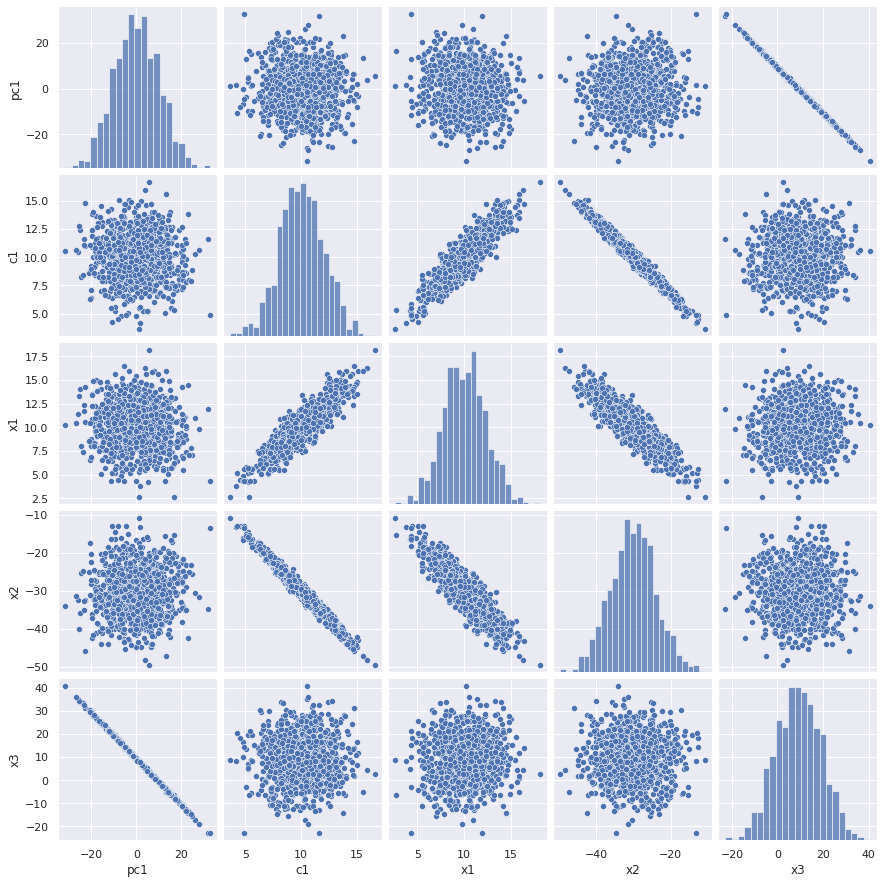

In [11]:
# Set parameters & seed
np.random.seed(7463)
n = 1000

# Create components
c1 = np.random.normal(10,2,n)

# Create Variables
x1 = c1 + np.random.normal(0,1,n)
x2 = -3*c1 + np.random.normal(0,1,n)
x3 = np.random.normal(10,10,n)
# Create Pandas
x = pd.DataFrame.from_dict({'x1':x1,'x2':x2, 'x3':x3})
components = pd.DataFrame.from_dict({'c1':c1})

# PCA decomposition
pca = PCA(n_components=1)
principalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['pc1'])

finalDf = pd.concat([principalDf, components, x], axis = 1)
print('Explained Variance: ', pca.explained_variance_ratio_)
print('Sum of Explained Variance: ', np.sum(pca.explained_variance_ratio_))

sns.pairplot(finalDf)

### Respuesta Preguntas importantes:
1. La relacion entre pc1, c1, x1 & x2 se vio afectada drasticamente por la mayor varianza que presenta x3?




## Visualizacion III.2: Los extrannos son bienvenidos!
Aumentemos el numero de componentes principales a 2

### Preguntas importantes:
1. Como se relaciona pc1 con x1, x2 & x3?
2. Como se relaciona pc2 con x1, x2 & x3?
3. Existe un orden entre las columnas y los componentes?
(Nota con que columnas/variable se relaciona pc1 y pc2)?
4. Agregar un segundo componente fue buena idea? (observa la varianza total explicada)





Explained Variance:  [0.70106079 0.2922833 ]
Sum of Explained Variance:  0.9933440938140239


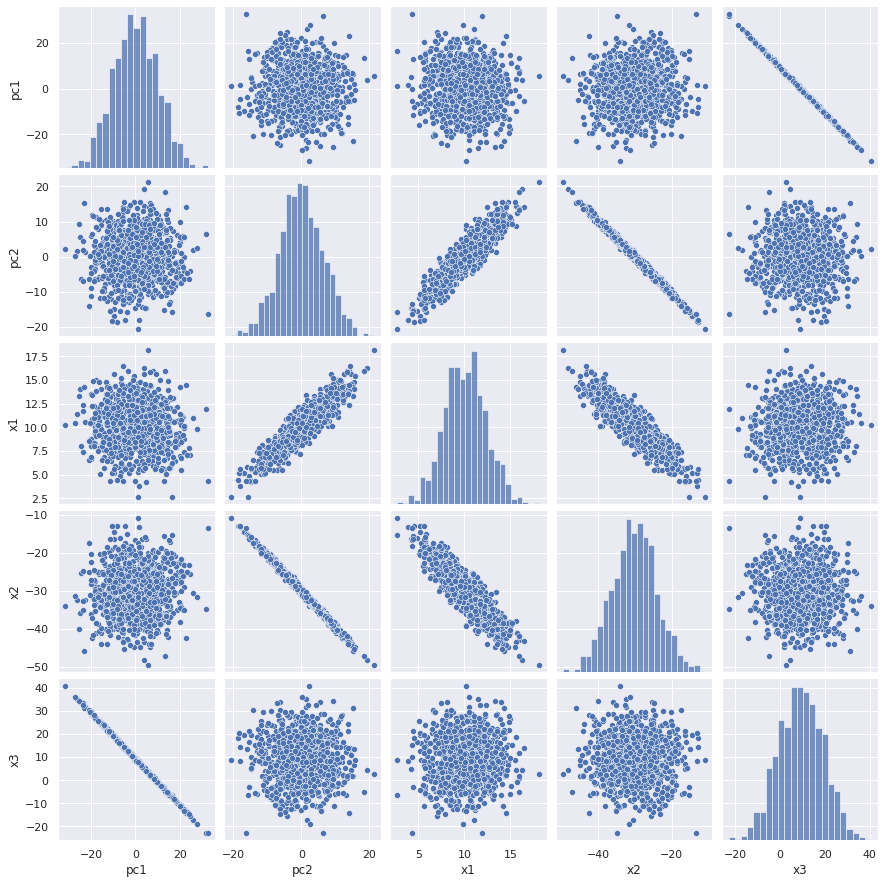

In [20]:
# Set parameters & seed
np.random.seed(7463)
n = 1000

# Create components
c1 = np.random.normal(10,2,n)

# Create Variables
x1 = c1 + np.random.normal(0,1,n)
x2 = -3*c1 + np.random.normal(0,1,n)
x3 = np.random.normal(10,10,n)
# Create Pandas
x = pd.DataFrame.from_dict({'x1':x1,'x2':x2, 'x3':x3})
components = pd.DataFrame.from_dict({'c1':c1})

# PCA decomposition
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['pc1', 'pc2'])

finalDf = pd.concat([principalDf, x], axis = 1)
print('Explained Variance: ', pca.explained_variance_ratio_)
print('Sum of Explained Variance: ', np.sum(pca.explained_variance_ratio_))

sns.pairplot(finalDf)

### Respuesta a Preguntas importantes:
1. Como se relaciona pc1 con x1, x2 & x3?
2. Como se relaciona pc2 con x1, x2 & x3?
3. Existe un orden entre las columnas y los componentes?
(Nota con que columnas/variable se relaciona pc1 y pc2)?
4. Agregar un segundo componente fue buena idea? (observa la varianza total explicada)





### Creemos una funcion para PCA


In [13]:
# Importemos el metodo de normalizacion
from sklearn.preprocessing import StandardScaler

def pca_fun(x=pd.DataFrame(), n_c=1, nor=False):
  # Define Method
  pca = PCA(n_components=n_c)

  # Standarize
  if nor:
    x_cols= x.columns
    std_scale = StandardScaler().fit(x)
    x = pd.DataFrame(std_scale.transform(x), columns=x_cols)

  principalComponents = pca.fit_transform(x)

  # Create names for pc
  pc_names = ['pc_{}'.format(a+1) for a in range(n_c)]

  # Compute PC
  principalDf = pd.DataFrame(data = principalComponents
             , columns = pc_names)

  # Create visualizations
  finalDf = pd.concat([principalDf, x], axis = 1)
  print('Explained Variance: ', pca.explained_variance_ratio_)
  print('Sum of Explained Variance: ', np.sum(pca.explained_variance_ratio_))

  sns.pairplot(finalDf)


Nota como agregamos la opcion de escalar nuestros datos, usando la libreria de sklearn. A continuacion te presentamos algunas fuentes que tocan este tema mas a detalle.

### Visualizaacion III.3: Normalizacion

#### Articulo sobre normalizacion:
Si deseas conocer mas sobre los metodos de normalizacion o escalamiento te recomendamos leer el siguiente articulo: 

https://towardsdatascience.com/scale-standardize-or-normalize-with-scikit-learn-6ccc7d176a02

Para teoricos:
https://www.researchgate.net/publication/255644479_On_Relationships_Between_Uncentred_And_Column-Centred_Principal_Component_Analysis

### Preguntas Importantes:
1. Que paso con la varianza explicada por los componentes cuando normalizamos los datos? (Hint: Piensa en la varianza de cada variable)

2. Deberiamos de normalizar/escalar/estandarizar antes de aplicar PCA?

Explained Variance:  [0.63228004 0.33212598]
Sum of Explained Variance:  0.96440602146757


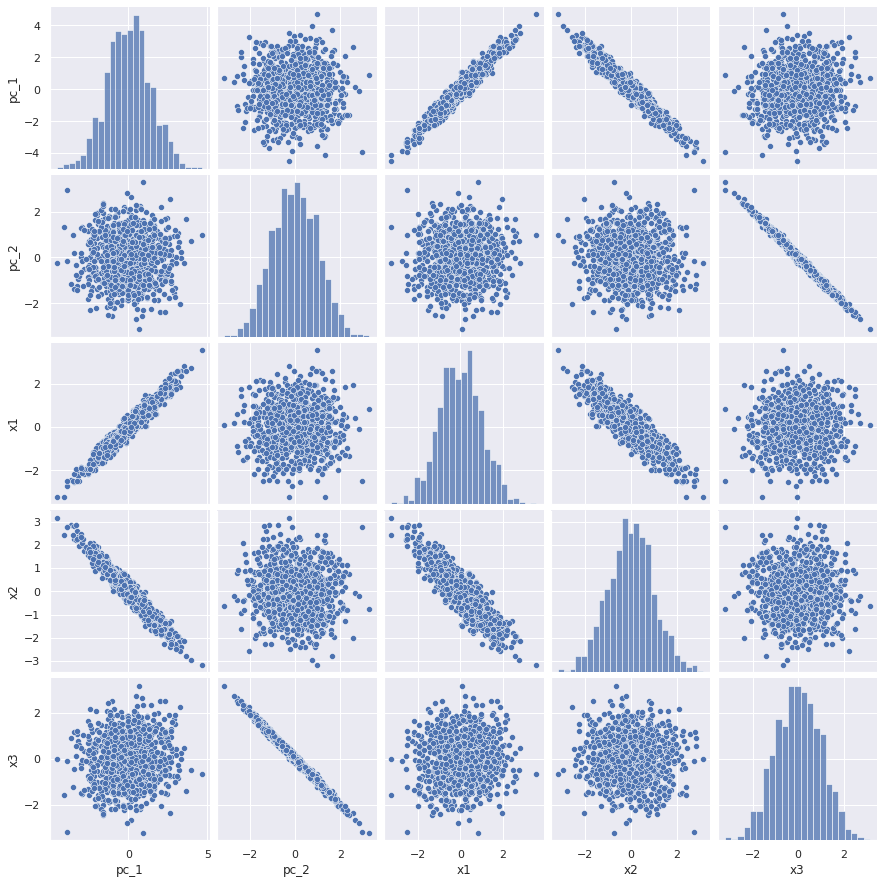

In [23]:
# Set parameters & seed
np.random.seed(7463)
n = 1000

# Create components
c1 = np.random.normal(10,2,n)

# Create Variables
x1 = c1 + np.random.normal(0,1,n)
x2 = -3*c1 + np.random.normal(0,1,n)
x3 = np.random.normal(10,10,n)
# Create Pandas
x = pd.DataFrame.from_dict({'x1':x1,'x2':x2, 'x3':x3})

pca_fun(x, n_c=2, nor=True)

## Visualizacion IV: Correlaciones!
Veamos que pasa con el PCA cuando las variablestienen un proceso lineal que relaciona expresado como correlacion.

Matriz de Correlacion
          x1        x2
x1  1.000000  0.901158
x2  0.901158  1.000000 

Explained Variance:  [0.95058071]
Sum of Explained Variance:  0.9505807063283276
Principal Componeents [[0.70927433 0.70493257]]


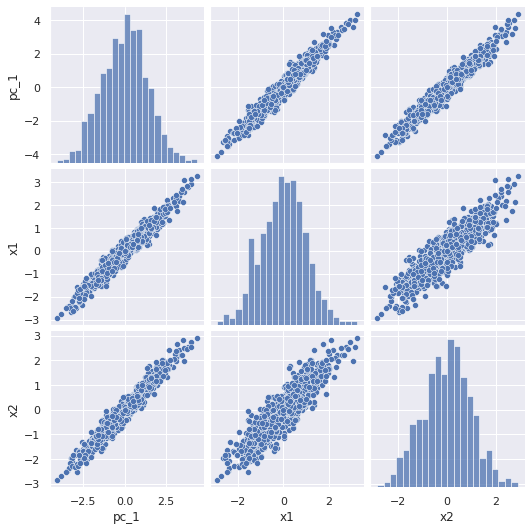

In [14]:
# Set parameters & seed
np.random.seed(7463)
n = 1000

# Create Variables
mean = [0, 0]
cov = np.array([[1, .9], 
                [.9, 1]]
      )
x = np.random.multivariate_normal(mean, cov, n)
x = pd.DataFrame(x, columns=['x1','x2'])
print('Matriz de Correlacion')
print(x.corr(), '\n')

pca_fun(x=x, n_c=1)

## Visualizacion V: No...Correlaciones!

Veamos que pasa con el PCA cuando las variables no tienen un proceso lineal que las relaciona.


### Preguntas importantes:
1. El PCA nos sirve para reducir la dimensionalidad de varibles correlacionadas? (Piensa en los escenarios posibles)


Matriz de Correlacion
          x1        x2
x1  1.000000  0.012764
x2  0.012764  1.000000 

Explained Variance:  [0.50706364 0.49293636]
Sum of Explained Variance:  1.0


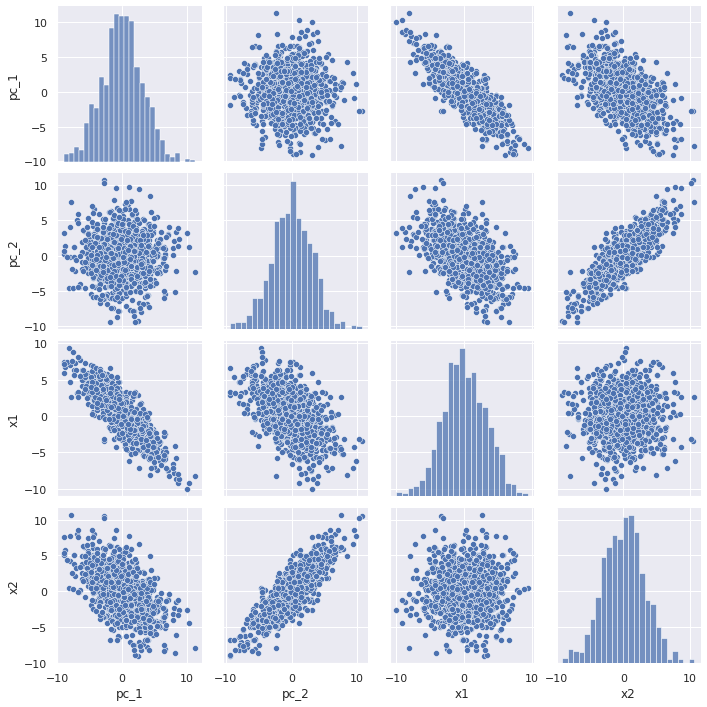

In [24]:
# Set parameters & seed
np.random.seed(7463)
n = 1000

# Create Variables
mean = [0, 0]
cov = np.array([[10, 0], 
                [0, 10]]
      )
x = np.random.multivariate_normal(mean, cov, n)
x = pd.DataFrame(x, columns=['x1','x2'])
print('Matriz de Correlacion')
print(x.corr(), '\n')

pca_fun(x=x, n_c=2)

### Creemos una funcion que regrese distribuciones multivariadas

In [25]:
def cor_data(mu=[0,0,0], sigma=np.eye(3), n=1000, seed=7463):
  np.random.seed(seed)
  x_names = ["x{}".format(a+1) for a in range(len(mu))]
  x = np.random.multivariate_normal(mu, sigma, n)
  x = pd.DataFrame(x, columns=x_names)
  print('Matriz de Correlacion')
  print(x.corr(), '\n')
  return x

## Visualizacion V: No...Correlaciones!

Veamos que pasa con el PCA cuando las variables no tienen un proceso lineal que las relaciona.


Matriz de Correlacion
          x1        x2        x3
x1  1.000000 -0.003892  0.003338
x2 -0.003892  1.000000  0.030582
x3  0.003338  0.030582  1.000000 

Explained Variance:  [0.34598745 0.33983201 0.31418054]
Sum of Explained Variance:  1.0


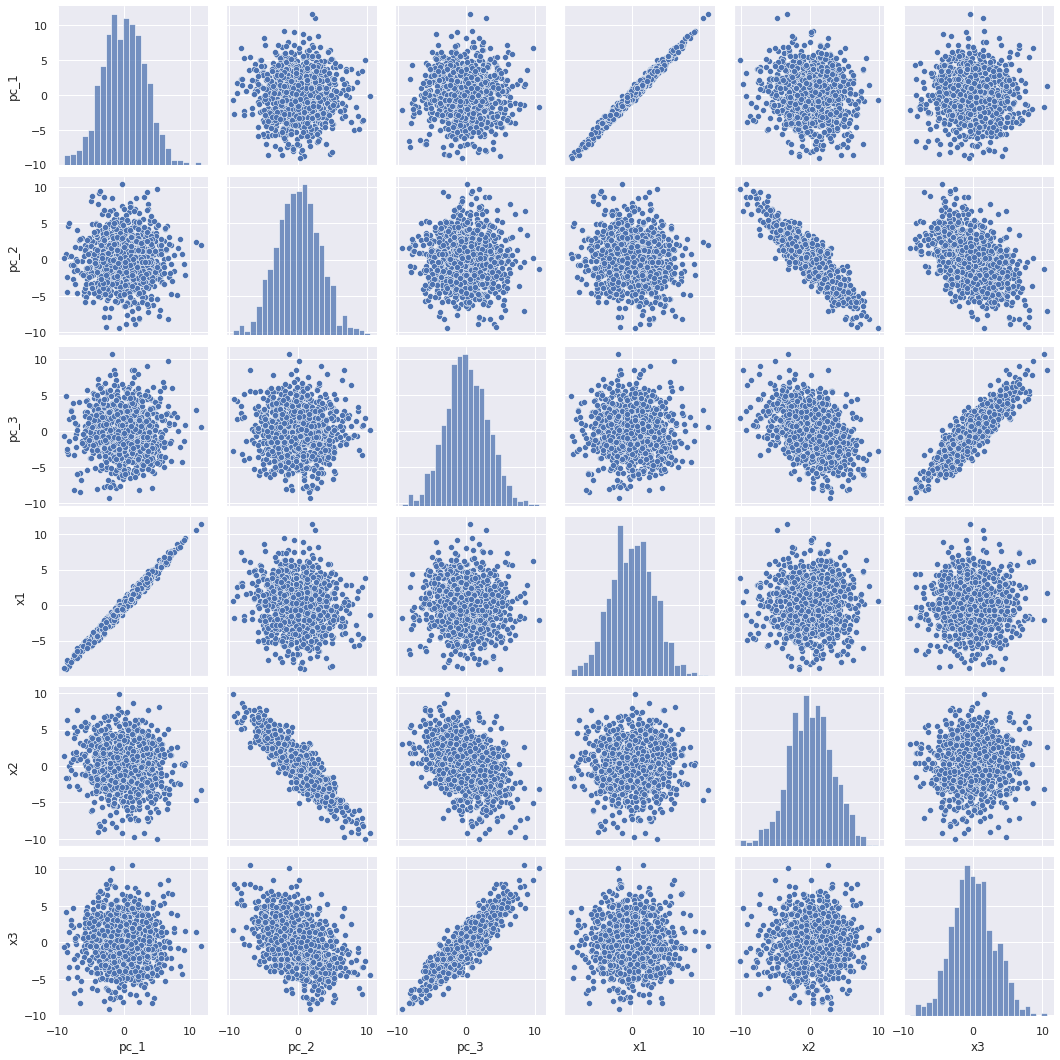

In [31]:
# Create Variables
mean = [0, 0, 0]
cov = np.array([[10, 0, 0], 
                [0, 10,0],
                [0,0,10]])
x = cor_data(mean, cov)
pca_fun(x=x, n_c=3)


# Tarea
Que pasa con el PCA si las variables estan relacioandas, pero no de manera lineal?
Especificamente que pasara con la varianza explicada por cada componente?

Hint: Revisa las siguientes dos celdas, y no olvides escalar las variables.

Explained Variance:  [0.50168205 0.49831795]
Sum of Explained Variance:  1.0


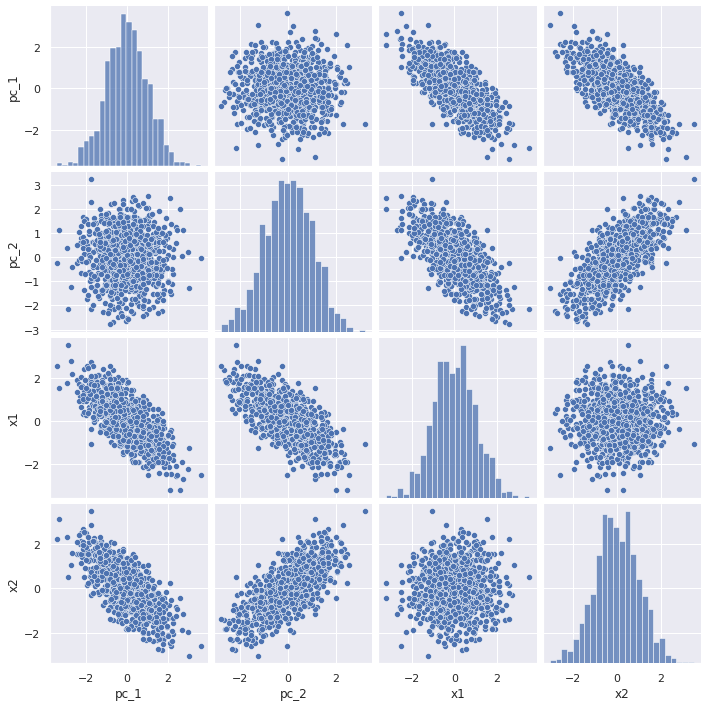

In [34]:
# Set parameters & seed
np.random.seed(7463)
n = 1000

# Create components
c1 = np.random.normal(10,2,n)

# Create Variables
x1 = c1 + np.random.normal(0,1,n)
x2 = -3*(1/c1) + np.random.normal(0,1,n)

x = pd.DataFrame.from_dict({'x1':x1,'x2':x2})

pca_fun(x=x, n_c=2, nor=True)

Explained Variance:  [0.50089654 0.49910346]
Sum of Explained Variance:  1.0


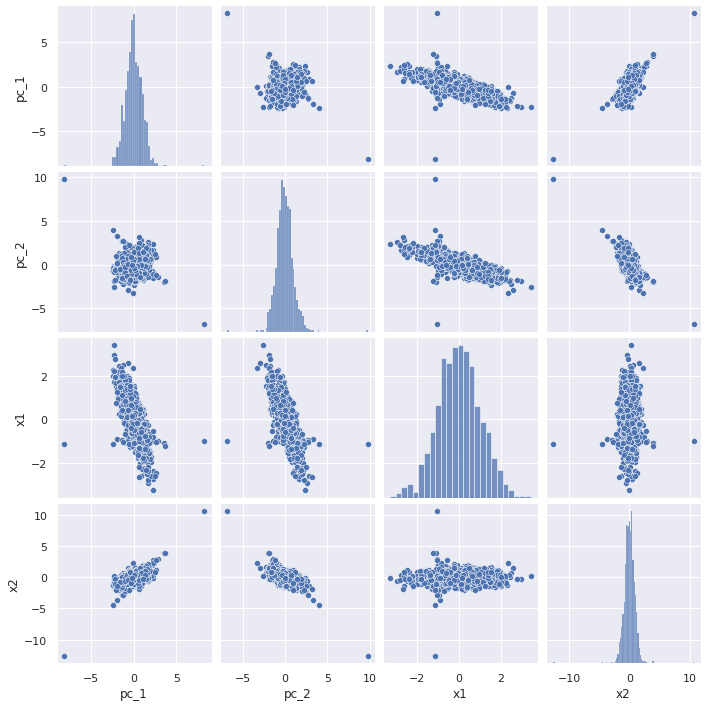

In [37]:
# Set parameters & seed
np.random.seed(7463)
n = 1000

# Create components
c1 = np.random.normal(10,10,n)

# Create Variables
x1 = c1 + np.random.normal(0,1,n)
x2 = (1/c1) + np.random.normal(0,1,n)

x = pd.DataFrame.from_dict({'x1':x1,'x2':x2})

pca_fun(x=x, n_c=2, nor=True)

# PCA: Aplicaciones

Usemos nuestras funciones de exploracion de datos


In [39]:
# Podemos separarla en funciones mas modulares
def print_s():
    print("\n  --------------------------- \n")

def glimpse_df(df):
  print('               Head              \n')
  print(df.head())
  print_s()  
  print('               Info              \n')
  print(df.info())
  print_s()
  print("              Describe           \n")
  print(df.describe())
  print_s()
  print("                NaN              \n")
  df_ = df[df.isna().any(axis=1)]
  print(df_)



In [41]:
df = sns.load_dataset('iris')
glimpse_df(df)

               Head              

   sepal_length  sepal_width  petal_length  petal_width species
0           5.1          3.5           1.4          0.2  setosa
1           4.9          3.0           1.4          0.2  setosa
2           4.7          3.2           1.3          0.2  setosa
3           4.6          3.1           1.5          0.2  setosa
4           5.0          3.6           1.4          0.2  setosa

  --------------------------- 

               Info              

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB
None

  --------------------------- 

              Desc

In [46]:
df[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']].corr()

,sepal_length,sepal_width,petal_length,petal_width
sepal_length,1.000000,-0.117570,0.871754,0.817941
sepal_width,-0.117570,1.000000,-0.428440,-0.366126
petal_length,0.871754,-0.428440,1.000000,0.962865
petal_width,0.817941,-0.366126,0.962865,1.000000


In [47]:
df.groupby('species').corr()

sepal_length  sepal_width  petal_length  petal_width
species                                                                      
setosa     sepal_length      1.000000     0.742547      0.267176     0.278098
           sepal_width       0.742547     1.000000      0.177700     0.232752
           petal_length      0.267176     0.177700      1.000000     0.331630
           petal_width       0.278098     0.232752      0.331630     1.000000
versicolor sepal_length      1.000000     0.525911      0.754049     0.546461
           sepal_width       0.525911     1.000000      0.560522     0.663999
           petal_length      0.754049     0.560522      1.000000     0.786668
           petal_width       0.546461     0.663999      0.786668     1.000000
virginica  sepal_length      1.000000     0.457228      0.864225     0.281108
           sepal_width       0.457228     1.000000      0.401045     0.537728
           petal_length      0.864225     0.401045      1.000000     0.322108
           petal_width       0.281108     0.537728      0.322108     1.000000

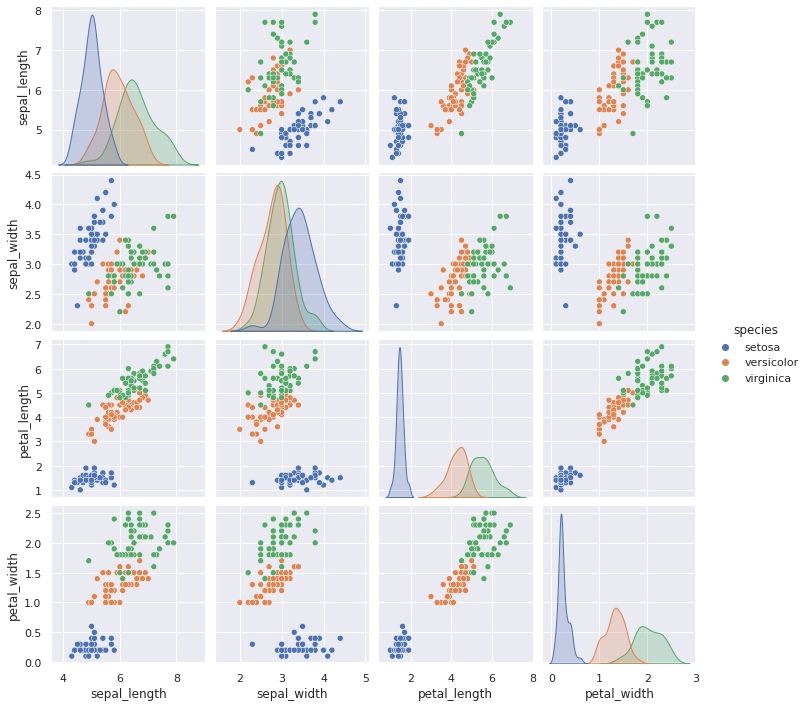

In [43]:
sns.pairplot(df, hue='species')

Explained Variance:  [0.72962445 0.22850762]
Sum of Explained Variance:  0.9581320720000164


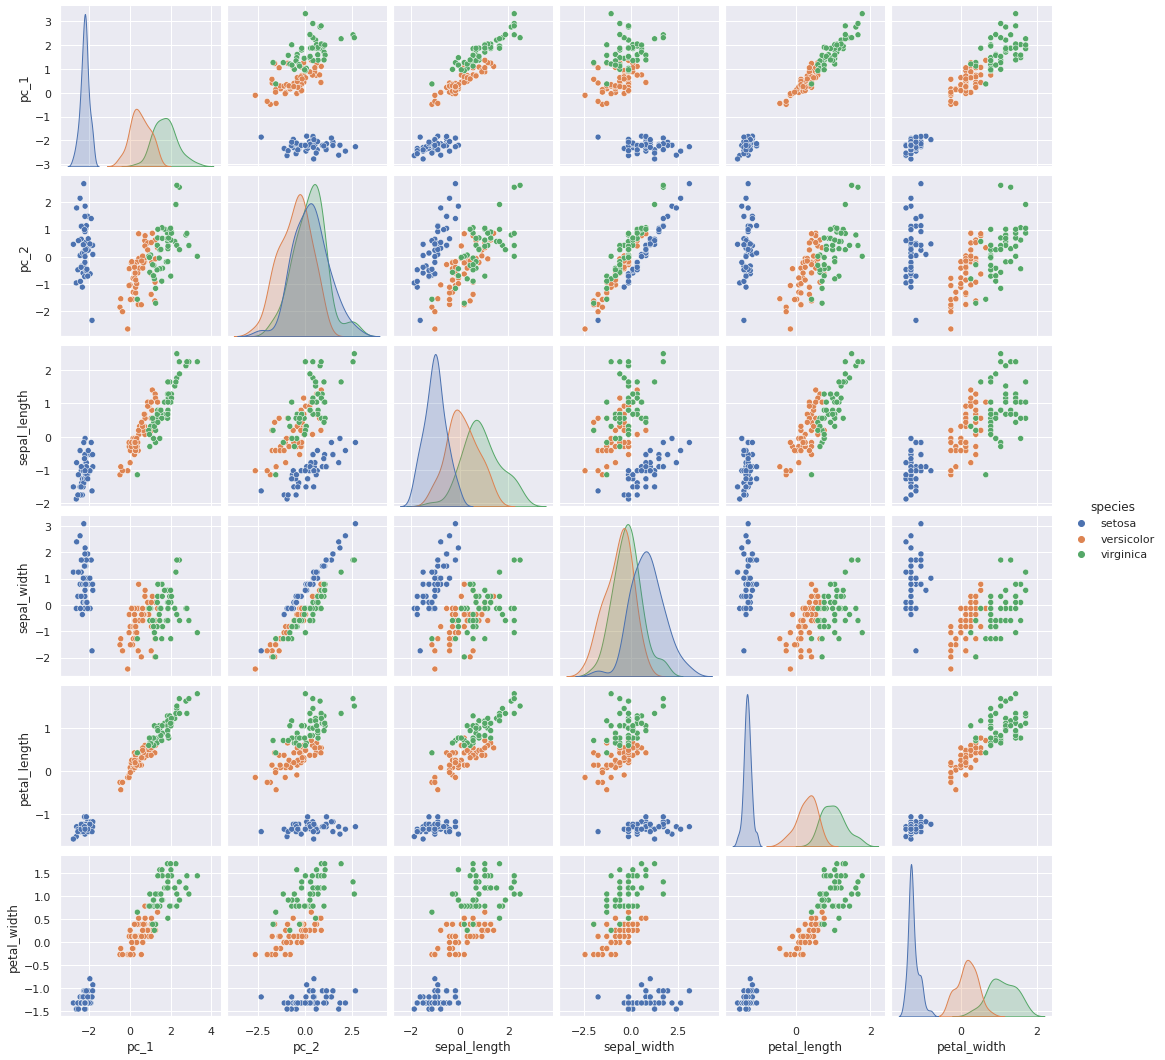

In [52]:
n_c = 2

# Define Method
pca = PCA(n_components=n_c)
x = df[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']]

# Standarize
x_cols= x.columns
std_scale = StandardScaler().fit(x)
x = pd.DataFrame(std_scale.transform(x), columns=x_cols)

principalComponents = pca.fit_transform(x)

# Create names for pc
pc_names = ['pc_{}'.format(a+1) for a in range(n_c)]

# Compute PC
principalDf = pd.DataFrame(data = principalComponents
             , columns = pc_names)

# Create visualizations
finalDf = pd.concat([principalDf, x, df[['species']]], axis = 1)
print('Explained Variance: ', pca.explained_variance_ratio_)
print('Sum of Explained Variance: ', np.sum(pca.explained_variance_ratio_))

sns.pairplot(finalDf, hue='species')


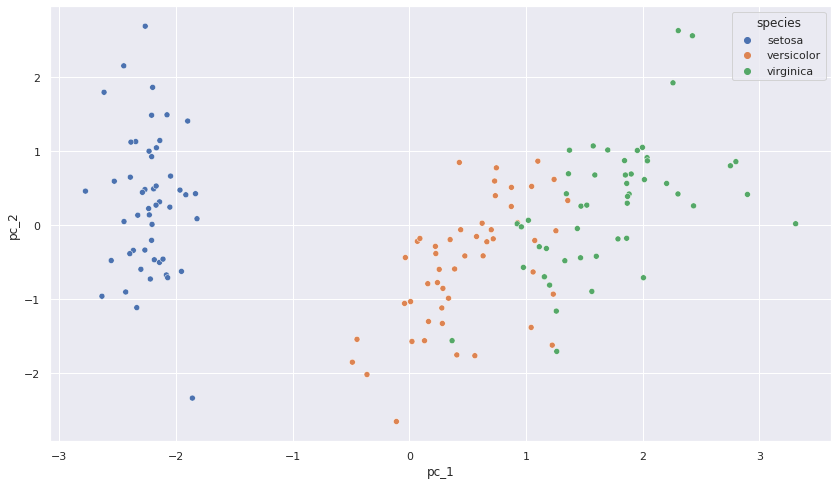

In [56]:
sns.scatterplot(data=finalDf[['species', 'pc_1', 'pc_2']], x='pc_1', y='pc_2',
                hue='species')
